# Armijo line search examples

Consider the Himmelblau function 

\begin{equation*}
	\begin{aligned}
		& \underset{x_1,x_2}{\text{minimize}}
		& & f(x_1,x_2) = \left(1 - x_{1}\right)^{2} + \left(1 - x_{2}\right)^{2} + \frac{\left(- x_{1}^{2} + 2 x_{2}\right)^{2}}{2}\\
	\end{aligned}
\end{equation*}

having a gradient 
$$ 
\nabla f(\mathbf{x}) = \left[\begin{matrix}4 x_{1} \left(x_{1}^{2} + x_{2} - 11\right) + 2 x_{1} + 2 x_{2}^{2} - 14\\2 x_{1}^{2} + 4 x_{2} \left(x_{1} + x_{2}^{2} - 7\right) + 2 x_{2} - 22\end{matrix}\right]
$$
a Hessian 
$$
\nabla^2f(\mathbf{x}) = H = \left[\begin{matrix}12 x_{1}^{2} + 4 x_{2} - 42 & 4 x_{1} + 4 x_{2}\\4 x_{1} + 4 x_{2} & 4 x_{1} + 12 x_{2}^{2} - 26\end{matrix}\right]
$$


and multiple local minimizers with identical function values:

$$f(3.0,2.0)=0.0,\quad$$
$$f(-2.805118,3.131312)=0.0,\quad$$
$$f(-3.779310,-3.283186)=0.0,\quad$$
$$f(3.584428,-1.848126)=0.0.\quad$$

The Himmelblau function has a maximizer at 

$x_1=-0.270845$ and $x_2=-0.923039$, where $f(x_1,x_2)=181.617$


We define the function `f` and its gradient `grad_f` using the below inline functions 


In [1]:
import numpy as np

f = lambda x: (((x[0,:]**2) + x[1,:] - 11)**2) + ((x[0,:] + (x[1,:]**2) -7)**2)
grad_f = lambda x: np.array([[4*x[0,:]*(x[0,:]**2 + x[1,:] - 11) + 2*x[0,:] + 2*x[1,:]**2 - 14], [2*x[0,:]**2 + 4*x[1,:]*(x[0,:] + x[1,:]**2 - 7) + 2*x[1,:] - 22]])
H_f = lambda x: np.array([[list(12*x[0,:]**2 + 4*x[1,:] - 42), list(4*x[0,:] + 4*x[1,:])], [list(4*x[0,:] + 4*x[1,:]), list(4*x[0,:] + 12*x[1,:]**2 - 26)]])

We also generate a grid of points where $-5 \leq x_1 \leq 5$ and $-5 \leq x_2 \leq 5$ to visualize this function using a contour map

In [2]:

import matplotlib.pyplot as plt
from matplotlib import cm

X1,X2 = np.meshgrid(np.linspace(-5,5,40),np.linspace(-5,5,40))
X = np.vstack((X1.reshape([1,-1]),X2.reshape([1,-1]))) # flatten grids side-by-side

Z = f(X)
Z_grad = grad_f(X)

Let us choose a starting point 
$$\mathbf{x}_0 = \left(-1.0,0.0\right)$$
This gives a steepest descent direction 
$$\mathbf{d}_0=-\nabla f(\mathbf{x}_0) = \begin{bmatrix}-2 & -8\end{bmatrix}^\mathrm{T}$$

We plot the function (given by isocontours), the initial point $\mathbf{x}_0$, the true minimizer $\mathbf{x}^*$, the gradient vector $\nabla f(\mathbf{x}_k)$ and the steepest decent direction $-\nabla f(\mathbf{x}_k)$ below

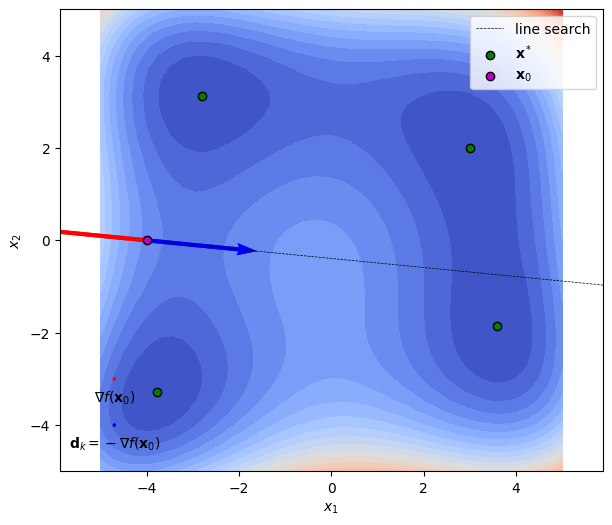

In [3]:
x0 = np.array([-4,-0])
grad_f0 = grad_f(x0[:,None]).squeeze()
H_f0 = H_f(x0[:,None]).squeeze()
d0 = -grad_f0
x_opt = np.array([[3.0,2.0],
    [-2.805118,3.131312],
    [-3.779310,-3.283186],
    [3.584428,-1.848126]])

origin = np.array([x0]*2).T # origin point
vectors = np.array([grad_f0, -grad_f0])

fig, ax = plt.subplots(figsize=(7,6))
# plot
ax.contourf(X1, X2, Z.reshape(X1.shape),cmap=cm.coolwarm,levels=25,zorder=-1)
Q = ax.quiver(*origin, vectors[0:1,0], vectors[0:1,1], color=['r',], scale=500, zorder=1)
ax.quiverkey(Q, 0.1, 0.2, 2, r"$\nabla f(\mathbf{x}_0)$", labelpos='S', coordinates='axes')
Q = ax.quiver(*origin, vectors[1:2,0], vectors[1:2,1], color=['b'], scale=500, zorder=1)
ax.quiverkey(Q, 0.1, 0.1, 2, r"$\mathbf{d}_k = -\nabla f(\mathbf{x}_0)$", labelpos='S', coordinates='axes')
ax.plot([x0[0],x0[0] + 10*d0[0]], [x0[1],x0[1] + 10*d0[1]], color="k", label="line search", linewidth=0.5, linestyle="--",zorder=2)
ax.scatter(x_opt[:,0], x_opt[:,1], marker="o", color="g", edgecolors="k", linestyle="None",label="$\mathbf{x}^*$",zorder=3)
ax.scatter([x0[0],], [x0[1],], marker="o", color="m", edgecolors="k", linestyle="None",label="$\mathbf{x}_0$",zorder=3)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.axis('equal')
ax.set_xlim((-5,5))
ax.set_ylim((-5,5))
ax.legend()
fig.canvas.draw()
# fig.savefig("linesearch_ex2_contours.pdf",bbox_inches="tight")

Lets us examine how the function changes its value along the search direction $\mathbf{d}_k$

$$\phi(\alpha) = f(\mathbf{x}_{k+1}) = f(\mathbf{x}_k + \alpha \mathbf{d}_k)$$

We also note that its derivative is (from the chain rule)
$$
\phi'(\alpha) = f'(\mathbf{x}_k + \alpha \mathbf{d}_k) = \nabla f(\mathbf{x}_k + \alpha \mathbf{d}_k)^\mathrm{T} \mathbf{d}_k,
$$ 

Let $\mathbf{x}_{1}$ be the next iterate, let us examine how $f(\mathbf{x}_{1})$ changes along the search direction $\mathbf{d}_0=-\nabla^{\mathrm{T}}f(\mathbf{x_0})$ at the current iterate $\mathbf{x}_0$. We derive an expression for $\phi(\alpha)$ at $\mathbf{x_0}$

$$\phi(\alpha) = f(\mathbf{x}_{1}) = f(\mathbf{x}_0 + \alpha \mathbf{d}_0)$$

and its derivative

$$\phi'(\alpha) = \nabla f(\mathbf{x}_0 + \alpha \mathbf{d}_0)^\mathrm{T} \mathbf{d}_0$$

We use the below symbolic expression to find the analytical equations representing $\phi(\alpha)$ and $\phi'(\alpha)$ by substituting $\mathbf{x}_0 + \alpha \mathbf{d}_0$ into $f$ and $\nabla f$

In [4]:
def get_real(roots, last=False):
    reals = [root for root in roots if root.is_real]
    if last:
        return reals[-1]
    else:
        return reals[0]

import sympy as sym
import sympy.physics.vector as spv
from sympy import pprint, latex, simplify
from sympy.plotting import plot

a = sym.Symbol(r"\alpha", real=True)
x1 = sym.Symbol(r"x_1")
x2 = sym.Symbol(r"x_2")

f_sym = (((x1**2) + x2 - 11)**2) + ((x1 + (x2**2) -7)**2)
display(f_sym)
# print(latex(f_sym))

# try the gradient approach
gradf_sym = sym.Matrix([sym.diff(f_sym,x1),sym.diff(f_sym,x2)])
display(gradf_sym)
# print(latex(gradf_sym))
# # find minimizer
# roots = sym.solve(gradf_sym, (x1, x2))

# Hessian
Hf_sym = sym.Matrix([[sym.diff(gradf_sym[0],x1),sym.diff(gradf_sym[0],x2)], [sym.diff(gradf_sym[1],x1),sym.diff(gradf_sym[1],x2)]])
# print(latex(Hf_sym))
# print(Hf_sym)
display(Hf_sym)

# substitute direction
f_sym = f_sym.subs({x1:x0[0]+d0[0]*a, x2: x0[1]+d0[1]*a})
display(f_sym.simplify())
# print(latex(f_sym.simplify()))

gradf_sym = gradf_sym.subs({x1:x0[0]+d0[0]*a, x2: x0[1]+d0[1]*a})
display(gradf_sym.applyfunc(simplify))
# print(latex(gradf_sym.applyfunc(simplify)))

df_sym=gradf_sym.dot(sym.Matrix([d0[0],d0[1]]))
display(df_sym.simplify())
# print(latex(df_sym.simplify()))

# differentiate and set equal to 0 to find alpha_min
# roots = sym.solve(df_sym,  a)

# a_min = float(get_real(roots))
# display(a_min)

(x_1 + x_2**2 - 7)**2 + (x_1**2 + x_2 - 11)**2

Matrix([
[4*x_1*(x_1**2 + x_2 - 11) + 2*x_1 + 2*x_2**2 - 14],
[ 2*x_1**2 + 4*x_2*(x_1 + x_2**2 - 7) + 2*x_2 - 22]])

Matrix([
[12*x_1**2 + 4*x_2 - 42,          4*x_1 + 4*x_2],
[         4*x_1 + 4*x_2, 4*x_1 + 12*x_2**2 - 26]])

108253216*\alpha**4 - 17167008*\alpha**3 + 794520*\alpha**2 - 10504*\alpha + 146

Matrix([
[4244832*\alpha**3 - 503272*\alpha**2 + 15460*\alpha - 102],
[     -4000*\alpha**3 + 16728*\alpha**2 - 1212*\alpha + 10]])

433012864*\alpha**3 - 51501024*\alpha**2 + 1589040*\alpha - 10504

Armijo's rule for line search specifies the following two conditions on $\alpha$ to ensure sufficient descent (given in terms of the first-order Taylor series expansion at $\alpha=0$)

\begin{align*}
    \phi(\alpha) & \le \phi(0) + \epsilon\phi'(0)\alpha = \psi(\alpha;\epsilon)\\
    \phi(2\alpha) & \ge \phi(0) + 2\epsilon\phi'(0)\alpha = \psi(\alpha;2\epsilon)
\end{align*}

We visualize these conditions along the search direction given by the plot below.

We also obtain the exact line search solution $\alpha^*$ given by the second order approximation as 

$$\alpha^*_k = \dfrac{\nabla f_k^\mathrm{T} \nabla f_k}{\nabla f_k^\mathrm{T} H_k \nabla f_k}$$

We also check the SOSCs:

$$\nabla f_k^\mathrm{T} H_k \nabla f_k \overset{?}{>} 0$$

exact line search alpha : 0.00661
SOSCs check : 1589040.00
global minimizer for alpha : 0.07374


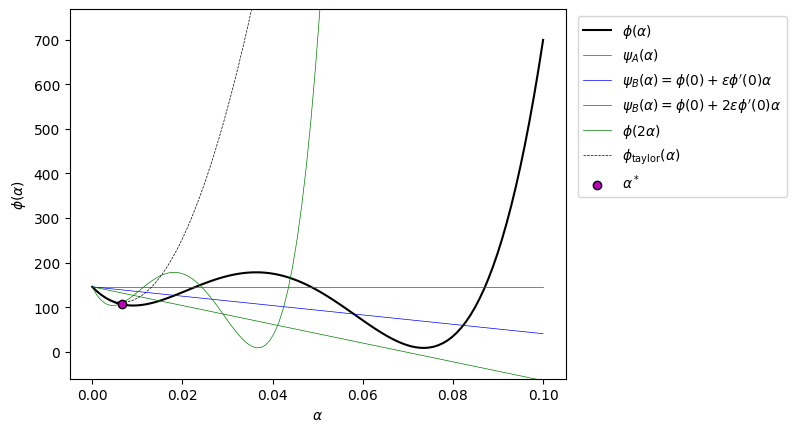

In [5]:
alpha = np.linspace(0,0.1,100)
phi = lambda alpha: f(x0[:,None] + alpha*d0[:, None])
phi_prime = lambda alpha: grad_f(x0[:,None] + alpha*d0[:, None]).T @ d0[:, None]
phi_taylor = lambda alpha: f(x0[:,None]).squeeze() + alpha*(grad_f(x0[:,None]).squeeze().T @ d0[:, None]) + ((alpha**2)/2)*(grad_f(x0[:,None]).squeeze().T @ H_f(x0[:, None]).squeeze() @ grad_f(x0[:,None]).squeeze())

e = 0.1

alpha_min = (grad_f0.T @ grad_f0) / (grad_f0.T @ H_f0 @ grad_f0)
print("exact line search alpha : %.5f" %alpha_min)
print("SOSCs check : %.2f" %(grad_f0.T @ H_f0 @ grad_f0))

# true minimizer for alpha (by brute force)
alpha_min_true = alpha[np.argmin(phi(alpha))]
print("global minimizer for alpha : %.5f" %alpha_min_true)

fig, ax = plt.subplots()
# plot
ax.plot(alpha, phi(alpha), color="k", linewidth=1.5, linestyle="-",zorder=-1,label=r"$\phi(\alpha)$")
ax.plot(alpha, [phi(0),]*len(alpha), color="r", linewidth=0.5, linestyle="-",label=r"$\psi_A(\alpha)$",zorder=-1)
ax.plot(alpha, phi(0) + e*alpha*phi_prime(0).squeeze(), color="b", linewidth=0.5, linestyle="-",label=r"$\psi_B(\alpha) = \phi(0)+\epsilon\phi'(0)\alpha$",zorder=-1)
ax.plot(alpha, phi(0) + 2*e*alpha*phi_prime(0).squeeze(), color="g", linewidth=0.5, linestyle="-",label=r"$\psi_B(\alpha) = \phi(0)+2\epsilon\phi'(0)\alpha$",zorder=-1)
ax.plot(alpha, phi(2*alpha), color="g", linewidth=0.5, linestyle="-",zorder=-1,label=r"$\phi(2\alpha)$")
ax.plot(alpha, phi_taylor(alpha), color="k", linewidth=0.5, linestyle="--",zorder=-1,label=r"$\phi_\mathrm{taylor}(\alpha)$")

ax.scatter([alpha_min,], [phi(alpha_min),], marker="o", color="m", edgecolors="k", linestyle="None",label=r"$\alpha^*$",zorder=1)


ypad = (max(phi(alpha)) - min(phi(alpha))) * 0.1

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\phi(\alpha)$")
# ax.set_xlim((0,0.9))
ax.set_ylim((min(phi(alpha))-ypad,max(phi(alpha))+ypad))
ax.legend(ncol=1,loc='upper left',bbox_to_anchor=(1.01, 1.00))
fig.canvas.draw()
# fig.savefig("linesearch_ex2_projection.pdf",bbox_inches="tight")

We can see that exact line search yields $\alpha_k^* = 0.0066$. By visual inspection, we can see that the global minimizer is actually at $\alpha_k = 0.07374$.

Let us check the Armijo line search results

* Case A: If $\phi(\alpha)$ exceeds $\phi(0)$, i.e., $f(\mathbf{x}_0 + \alpha\mathbf{d}_0) > f(\mathbf{x}_0)$, then no descent occurs and this represents an upper limit on the possible values of $\alpha < \alpha_A$, where $\alpha_A$ is the root of $\phi(\alpha) = \phi(0)$.

* Case B: $\alpha$ must be such that $\phi(\alpha) \le \phi(0) + \epsilon\phi'(0)\alpha$, to not be considered too large. This is a stricter upper bound on $\alpha < \alpha_B$, where $\alpha_B$ is the root of $\phi(\alpha) = \phi(0) + \epsilon\phi'(0)\alpha$.

* Case B: $\alpha$ must be such that $\phi(2\alpha) \ge \phi(0) + 2\epsilon\phi'(0)\alpha$, to not be considered too small. This is a lower bound on $\alpha > \alpha_C$, where $\alpha_C$ is the root of $\phi(2\alpha) = \phi(0) + 2\epsilon\phi'(0)\alpha$.

Any $\alpha \in (\alpha_C,\alpha_B)$ is considered an acceptable step size that provides sufficient descent.

In this case by visually inspecting the graph above, we can see that Armijo's line search yields the acceptable range:

$\alpha \in (0.059,0.082)$